In [ ]:
import nltk
from nltk.corpus import gutenberg
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
import re
def remove_symbols(line):
  return re.sub('[^A-Za-z0-9/s]+', '', line).lower()

In [ ]:
print (gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [ ]:
emma = gutenberg.words('austen-emma.txt')
print (len(emma))

192427


In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

all_words = list(map(str.lower, emma))
words = set(all_words)
counts = []
for w in words:
  if not remove_symbols(w) == '':
    counts.append((porter.stem(w), all_words.count(w))) # stemming
# counts = [(w, all_words.count(w)) for w in words]

In [ ]:
counts[:15]

[('proclaim', 2),
 ('aladdin', 1),
 ('broadway', 1),
 ('stept', 3),
 ('complais', 2),
 ('hope', 7),
 ('desert', 2),
 ('plea', 6),
 ('overhear', 1),
 ('henc', 6),
 ('promot', 4),
 ('villain', 1),
 ('chees', 1),
 ('thi', 526),
 ('parti', 96)]

In [ ]:
freq_dict = {}
for (w, c) in counts:
  freq_dict[w] = c

In [ ]:
count_rank = ss.rankdata([c for w, c in counts])
counts_ranked = [(c[0], c[1], w) for c, w in zip(counts, count_rank)]
counts_sorted = sorted(counts_ranked, key=lambda _: _[2])

In [ ]:
print (counts_ranked[:15])

[('proclaim', 2, 3388.0), ('aladdin', 1, 1431.0), ('broadway', 1, 1431.0), ('stept', 3, 4201.0), ('complais', 2, 3388.0), ('hope', 7, 5499.5), ('desert', 2, 3388.0), ('plea', 6, 5319.0), ('overhear', 1, 1431.0), ('henc', 6, 5319.0), ('promot', 4, 4699.0), ('villain', 1, 1431.0), ('chees', 1, 1431.0), ('thi', 526, 7202.0), ('parti', 96, 7042.5)]


In [ ]:
counts_sorted[:10]

[('aladdin', 1, 1431.0),
 ('broadway', 1, 1431.0),
 ('overhear', 1, 1431.0),
 ('villain', 1, 1431.0),
 ('chees', 1, 1431.0),
 ('diet', 1, 1431.0),
 ('spoilt', 1, 1431.0),
 ('whiten', 1, 1431.0),
 ('uninterruptedli', 1, 1431.0),
 ('audibl', 1, 1431.0)]

In [ ]:
# FIND VALUES OF ALPHA, C

L = len(counts_sorted)
X = np.array([np.log(L - r + 1) for (w, c, r) in counts_sorted])
Y = np.array([np.log(c) for (w, c, r) in counts_sorted])

Z = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(Z, Y, rcond=None)[0]
m, c

(-1.3985878361253048, 12.229303917515788)

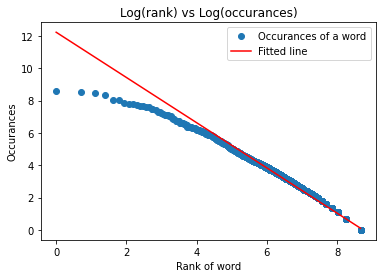

In [ ]:
# Validate ZIPF'S LAW

_ = plt.plot(X, Y, 'o', label='Occurances of a word')
_ = plt.plot(X, m*X+c, 'r', label='Fitted line')
_ = plt.legend()

plt.title('Log(rank) vs Log(occurances)')
plt.xlabel('Rank of word')
plt.ylabel('Occurances')
plt.show()

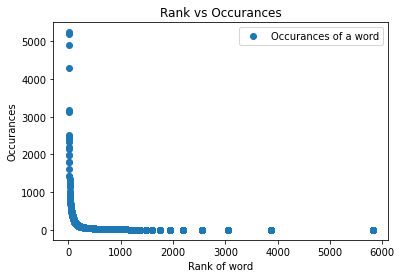

In [ ]:
plt.plot(np.array([L - r + 1 for (w, c, r) in counts_sorted]), np.array([c for (w, c, r) in counts_sorted]), 'o', label='Occurances of a word')
_ = plt.legend()

plt.title('Rank vs Occurances')
plt.xlabel('Rank of word')
plt.ylabel('Occurances')
plt.show()

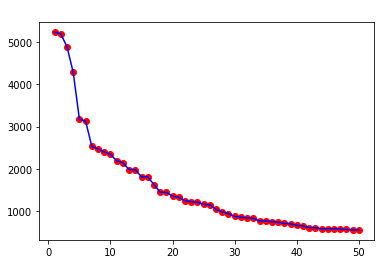

In [ ]:
last_elem = 50

y = list(reversed([c for _, c, _ in counts_sorted[-last_elem:]]))
x = [i for i in range(1, 51)]

plt.title(' ')
plt.scatter(x, y, color='r')
plt.plot(x, y, color='b')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

fd_without_stopwords = {}


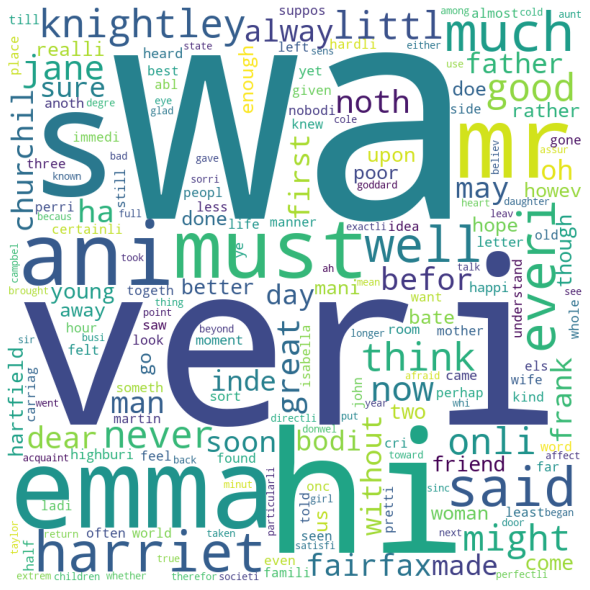

In [ ]:

# WordCloud without StopWords

for key in freq_dict:
  if key not in STOPWORDS:
    fd_without_stopwords[key] = freq_dict[key]

stopwords = set(STOPWORDS)

wordCloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10)

wordCloud.generate_from_frequencies(fd_without_stopwords)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

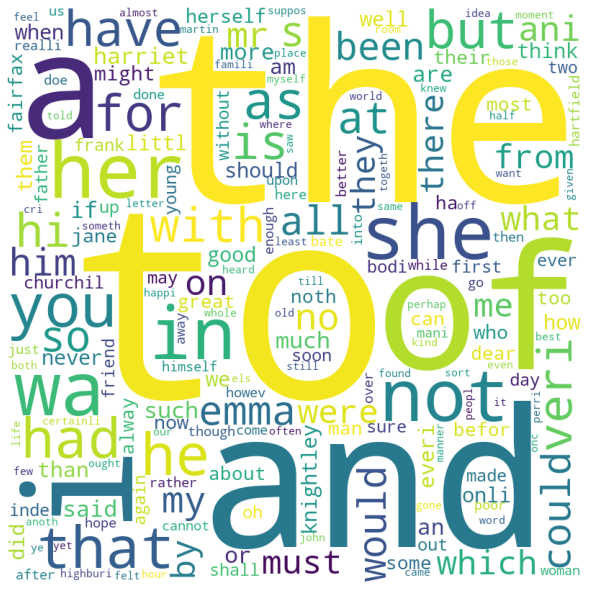

In [ ]:
# WordCloud with StopWords
wordCloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10)

wordCloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:

# l = []
# index = 0
# for key in freq_dict.keys():
#   if (index == 50):
#     break
#   if key not in fd_without_stopwords.keys():
#     print (key)
#     index = index + 1

# for key in fd_without_stopwords.keys():
#   if key == ',' or key == '.':
#     print(key)

.
,
